# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
 

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : ushuaia
Processing Record 2 of Set 1 : imbituba
Processing Record 3 of Set 1 : pevek
Processing Record 4 of Set 1 : rio gallegos
Processing Record 5 of Set 1 : touros
Processing Record 6 of Set 1 : hilo
City not found. Skipping...
Processing Record 7 of Set 1 : komsomolskiy
Processing Record 8 of Set 1 : okitipupa
Processing Record 9 of Set 1 : kedrovyy
Processing Record 10 of Set 1 : arraial do cabo
Processing Record 11 of Set 1 : prince rupert
Processing Record 12 of Set 1 : punta arenas
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : hermanus
Processing Record 15 of Set 1 : tiksi
Processing Record 16 of Set 1 : toucheng
City not found. Skipping...
Processing Record 17 of Set 1 : qaanaaq
Processing Record 18 of Set 1 : ixtapa
Processing Record 19 of Set 1 : rudsar
Processing Record 20 of Set 1 : bluff
City not found. Skipping...
City not found. Skipping...
Processing Record 

Processing Record 29 of Set 4 : dolores
Processing Record 30 of Set 4 : dalmeny
City not found. Skipping...
Processing Record 31 of Set 4 : kushmurun
Processing Record 32 of Set 4 : flinders
City not found. Skipping...
Processing Record 33 of Set 4 : klaipeda
Processing Record 34 of Set 4 : moa
Processing Record 35 of Set 4 : wuxi
Processing Record 36 of Set 4 : akdepe
Processing Record 37 of Set 4 : mount gambier
Processing Record 38 of Set 4 : elizabeth city
Processing Record 39 of Set 4 : warragul
Processing Record 40 of Set 4 : burns lake
Processing Record 41 of Set 4 : ponta do sol
Processing Record 42 of Set 4 : ternate
Processing Record 43 of Set 4 : moose factory
Processing Record 44 of Set 4 : bethel
Processing Record 45 of Set 4 : puerto baquerizo moreno
Processing Record 46 of Set 4 : babstovo
Processing Record 47 of Set 4 : saldanha
Processing Record 48 of Set 4 : ahipara
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 4 : leonforte
Proce

Processing Record 12 of Set 8 : maltahohe
Processing Record 13 of Set 8 : aswan
Processing Record 14 of Set 8 : nuuk
Processing Record 15 of Set 8 : ust-nera
Processing Record 16 of Set 8 : sechura
Processing Record 17 of Set 8 : wenzhou
City not found. Skipping...
Processing Record 18 of Set 8 : mutis
Processing Record 19 of Set 8 : north bend
Processing Record 20 of Set 8 : keetmanshoop
Processing Record 21 of Set 8 : metro
Processing Record 22 of Set 8 : alekseyevka
Processing Record 23 of Set 8 : calabozo
Processing Record 24 of Set 8 : talnakh
Processing Record 25 of Set 8 : havre
Processing Record 26 of Set 8 : lata
Processing Record 27 of Set 8 : laje
Processing Record 28 of Set 8 : vilhena
Processing Record 29 of Set 8 : katherine
Processing Record 30 of Set 8 : tezu
Processing Record 31 of Set 8 : vila velha
Processing Record 32 of Set 8 : naze
Processing Record 33 of Set 8 : tessalit
Processing Record 34 of Set 8 : coahuayana
Processing Record 35 of Set 8 : bocas del toro
Cit

In [17]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

# establish dataframe
weather_df = pd.DataFrame(weather_dict)

In [18]:
# Count data
weather_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
output_data_file = "output_data/cities.csv"
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1627145106,87,-54.8000,-68.3000,38.82,1.14
1,Imbituba,0,BR,1627145374,53,-28.2400,-48.6703,73.29,9.75
2,Pevek,94,RU,1627145374,93,69.7008,170.3133,37.18,5.68
3,Río Gallegos,0,AR,1627145317,53,-51.6226,-69.2181,44.65,6.91
4,Touros,12,BR,1627145222,50,-5.1989,-35.4608,88.70,20.29
...,...,...,...,...,...,...,...,...,...
533,West Wendover,1,US,1627145497,16,40.7391,-114.0733,83.41,4.61
534,Mehamn,100,NO,1627145497,87,71.0357,27.8492,44.89,25.75
535,Ligayan,41,PH,1627145497,82,4.6533,119.4706,83.37,14.83
536,Mandalgovi,80,MN,1627145497,76,45.7625,106.2708,64.13,7.09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

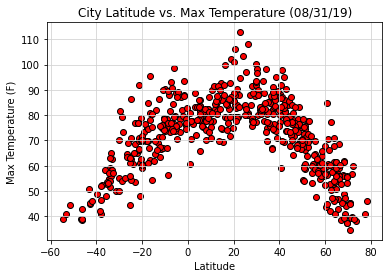

In [20]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

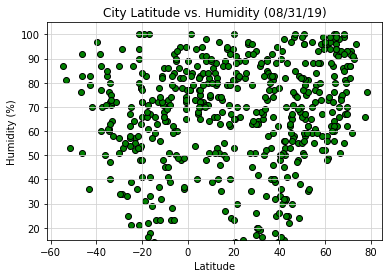

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

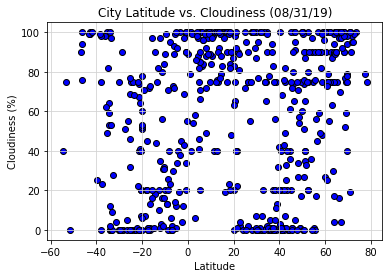

In [22]:

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

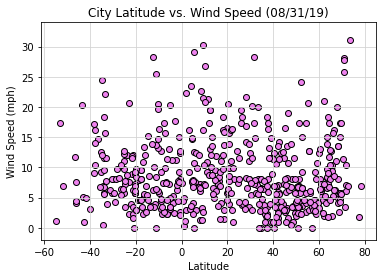

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="violet")
plt.title("City Latitude vs. Wind Speed (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [28]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.71


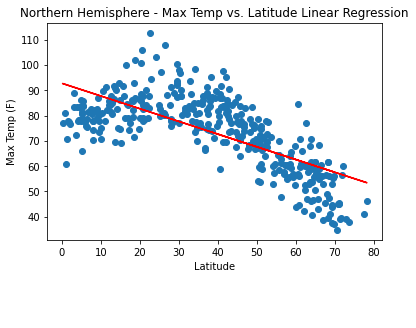

In [29]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


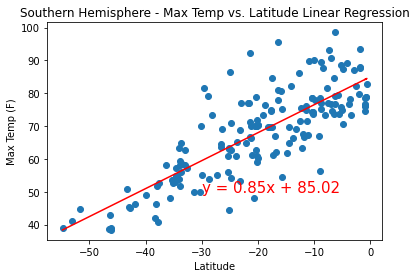

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.11


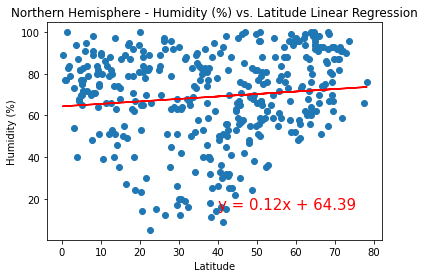

In [31]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.05


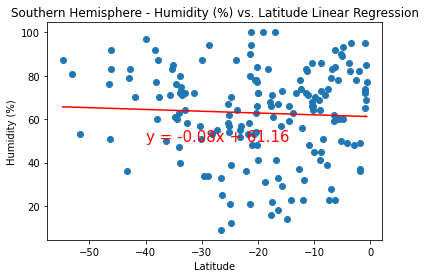

In [32]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


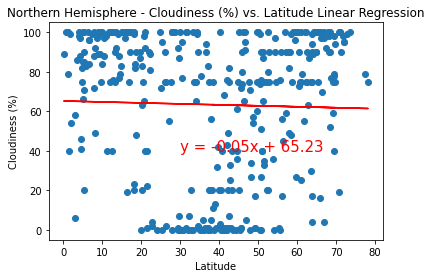

In [33]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.07


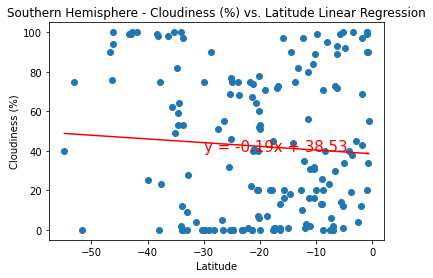

In [34]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.09


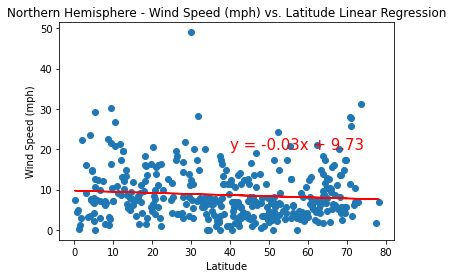

In [35]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.06


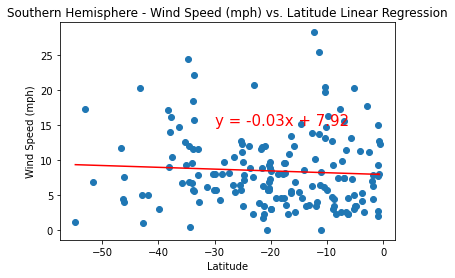

In [36]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")